In [2]:
import pandas as pd

# Charger les fichiers Parquet (en adaptant les chemins si besoin)
freq = pd.read_parquet("data/raw/freMTPLfreq.parquet")
sev = pd.read_parquet("data/raw/freMTPLsev.parquet")

# Afficher les premières lignes
display(freq.head())
display(sev.head())

,PolicyID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density
0,1,0,0.09,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
1,2,0,0.84,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
2,3,0,0.52,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
3,4,0,0.45,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
4,5,0,0.15,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60


,PolicyID,ClaimAmount
0,63987,1172
1,310037,1905
2,314463,1150
3,318713,1220
4,309380,55077


In [4]:
freq.describe()

,ClaimNb,Exposure,CarAge,DriverAge,Density
count,413169.000000,413169.000000,413169.000000,413169.000000,413169.000000
mean,0.039163,0.561088,7.532404,45.319876,1985.153913
std,0.204053,0.369477,5.763011,14.328120,4776.254543
min,0.000000,0.002732,0.000000,18.000000,2.000000
25%,0.000000,0.200000,3.000000,34.000000,67.000000
50%,0.000000,0.540000,7.000000,44.000000,287.000000
75%,0.000000,1.000000,12.000000,54.000000,1410.000000
max,4.000000,1.990000,100.000000,99.000000,27000.000000


In [11]:
!pip install pyarrow

       PolicyID        ClaimNb       Exposure   Power         CarAge  \
count    413169  413169.000000  413169.000000  413169  413169.000000   
unique   413169            NaN            NaN      12            NaN   
top           1            NaN            NaN       f            NaN   
freq          1            NaN            NaN   95718            NaN   
mean        NaN       0.039163       0.561088     NaN       7.532404   
std         NaN       0.204053       0.369477     NaN       5.763011   
min         NaN       0.000000       0.002732     NaN       0.000000   
25%         NaN       0.000000       0.200000     NaN       3.000000   
50%         NaN       0.000000       0.540000     NaN       7.000000   
75%         NaN       0.000000       1.000000     NaN      12.000000   
max         NaN       4.000000       1.990000     NaN     100.000000   

            DriverAge                       Brand      Gas  Region  \
count   413169.000000                      413169   413169  41316

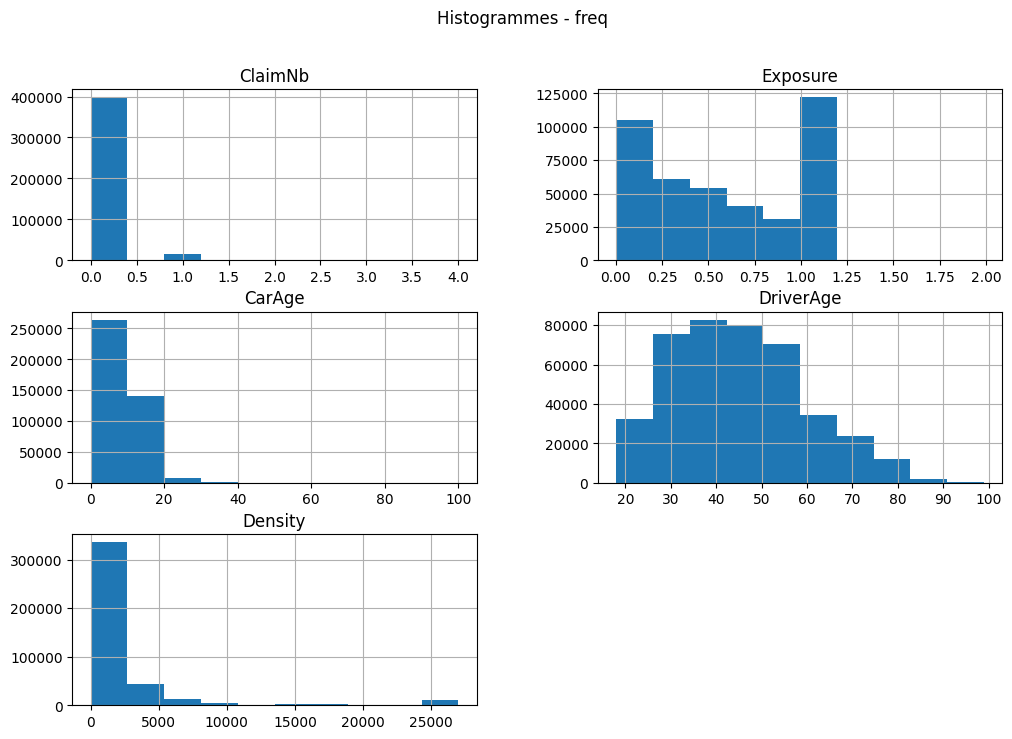

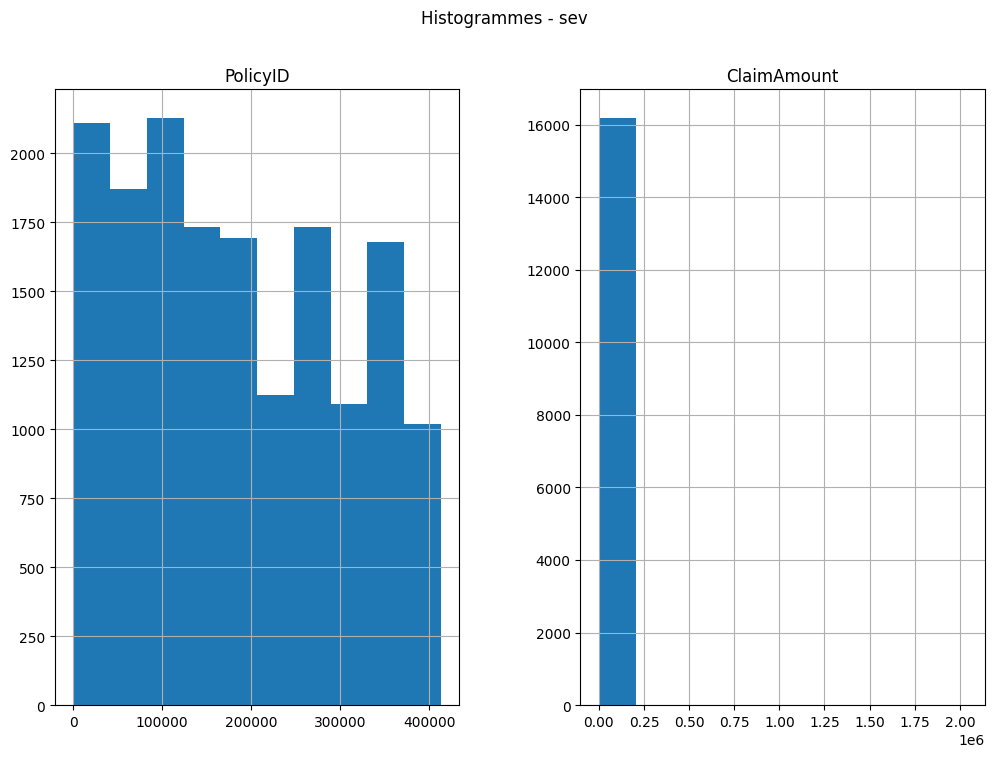

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les fichiers parquet
freq = pd.read_parquet("data/raw/freMTPLfreq.parquet")
sev = pd.read_parquet("data/raw/freMTPLsev.parquet")

# Statistiques descriptives
print(freq.describe(include='all'))
print(sev.describe(include='all'))

# Histogrammes des variables numériques
num_cols_freq = freq.select_dtypes(include='number').columns
num_cols_sev = sev.select_dtypes(include='number').columns

freq[num_cols_freq].hist(figsize=(12,8))
plt.suptitle("Histogrammes - freq")
plt.show()

sev[num_cols_sev].hist(figsize=(12,8))
plt.suptitle("Histogrammes - sev")
plt.show()

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


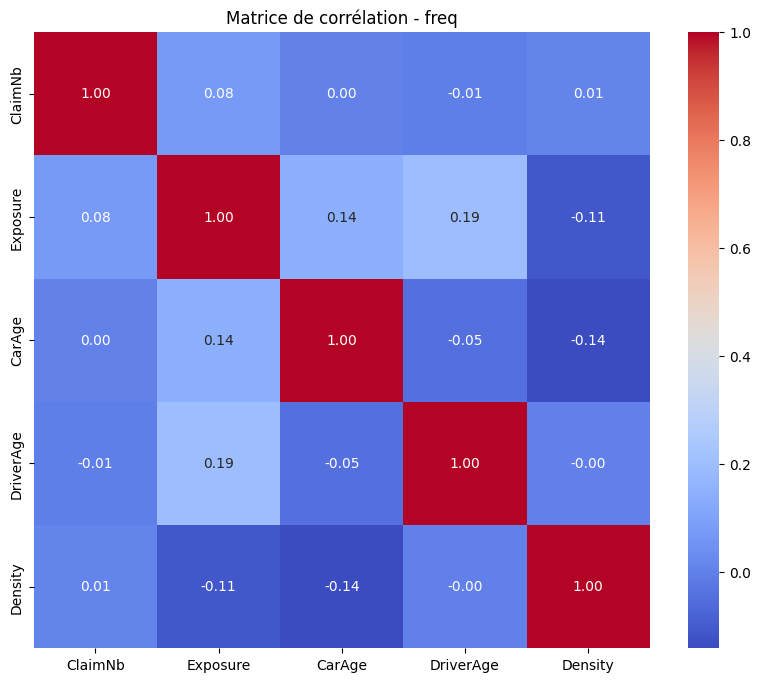

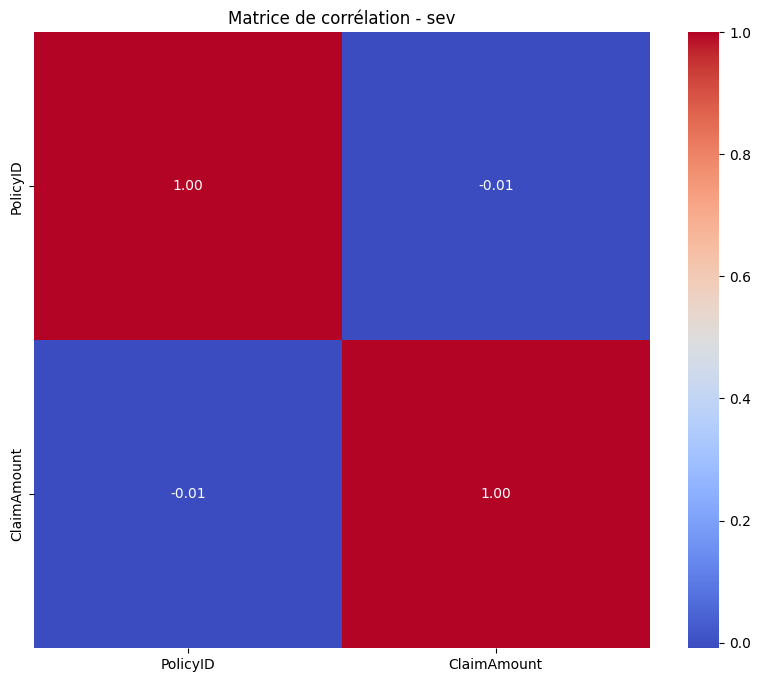

In [14]:

import seaborn as sns

# Charger vos fichiers parquet
freq = pd.read_parquet("data/raw/freMTPLfreq.parquet")
sev = pd.read_parquet("data/raw/freMTPLsev.parquet")

# --- Préparation : ne garder que les colonnes numériques ---
freq_num = freq.select_dtypes(include='number')
sev_num = sev.select_dtypes(include='number')

# --- Matrice de corrélation ---
corr_freq = freq_num.corr()
corr_sev = sev_num.corr()

# --- Heatmap freq ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_freq, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation - freq")
plt.show()

# --- Heatmap sev ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sev, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation - sev")
plt.show()

In [15]:
print("Fréquence - dimensions :", freq.shape)
print("Sévérité - dimensions :", sev.shape)

print(freq.dtypes)
print(sev.dtypes)

print("Valeurs manquantes freq:\n", freq.isna().mean()*100)
print("Valeurs manquantes sev:\n", sev.isna().mean()*100)

# Outliers via IQR
def detect_outliers(df, columns):
    out = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        out[col] = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).mean()
    return out

print("Outliers freq:", detect_outliers(freq, freq.select_dtypes('number').columns))
print("Outliers sev:", detect_outliers(sev, sev.select_dtypes('number').columns))

Fréquence - dimensions : (413169, 10)
Sévérité - dimensions : (16181, 2)
PolicyID     category
ClaimNb         int32
Exposure      float64
Power        category
CarAge          int32
DriverAge       int32
Brand        category
Gas          category
Region       category
Density         int32
dtype: object
PolicyID       int32
ClaimAmount    int32
dtype: object
Valeurs manquantes freq:
 PolicyID     0.0
ClaimNb      0.0
Exposure     0.0
Power        0.0
CarAge       0.0
DriverAge    0.0
Brand        0.0
Gas          0.0
Region       0.0
Density      0.0
dtype: float64
Valeurs manquantes sev:
 PolicyID       0.0
ClaimAmount    0.0
dtype: float64
Outliers freq: {'ClaimNb': np.float64(0.0372486803220958), 'Exposure': np.float64(0.0), 'CarAge': np.float64(0.004571979020691291), 'DriverAge': np.float64(0.003487676955434701), 'Density': np.float64(0.15433636115003788)}
Outliers sev: {'PolicyID': np.float64(0.0), 'ClaimAmount': np.float64(0.13101786045361843)}


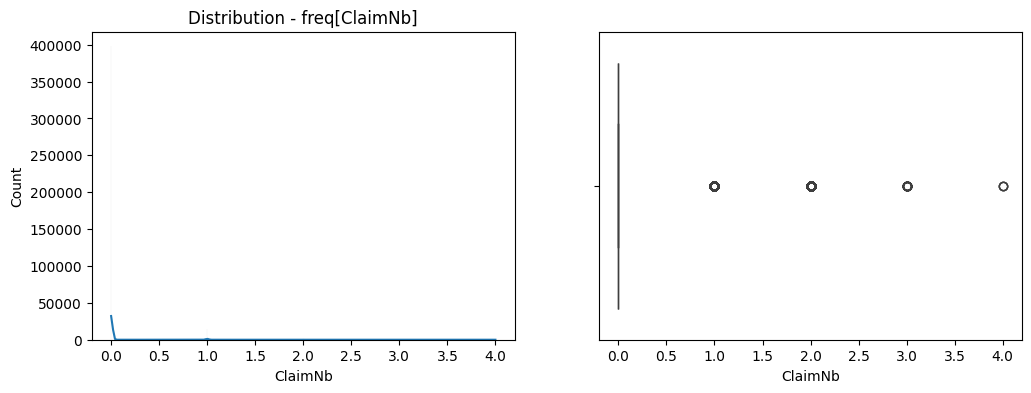

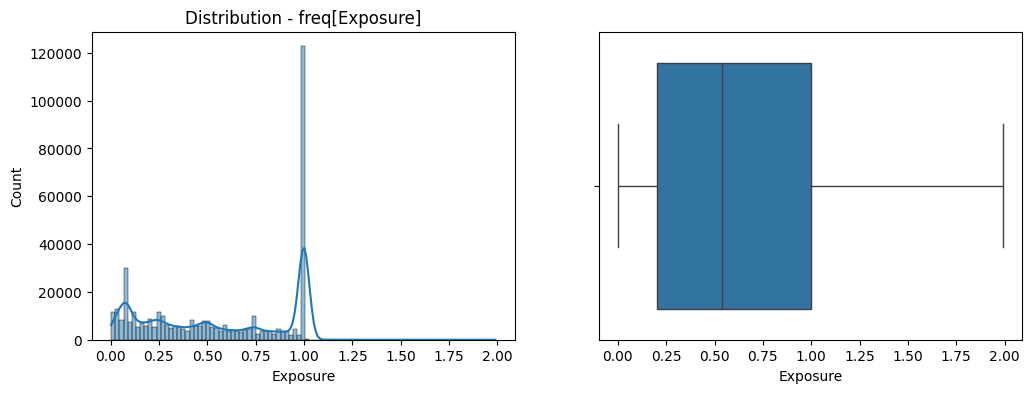

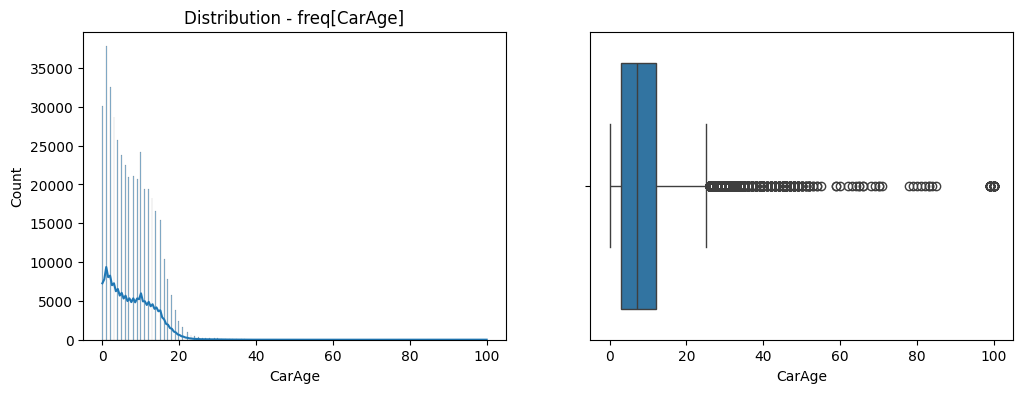

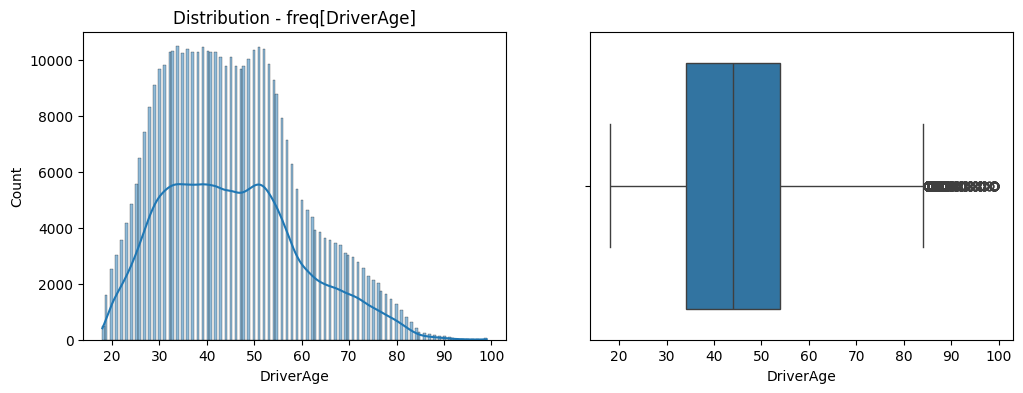

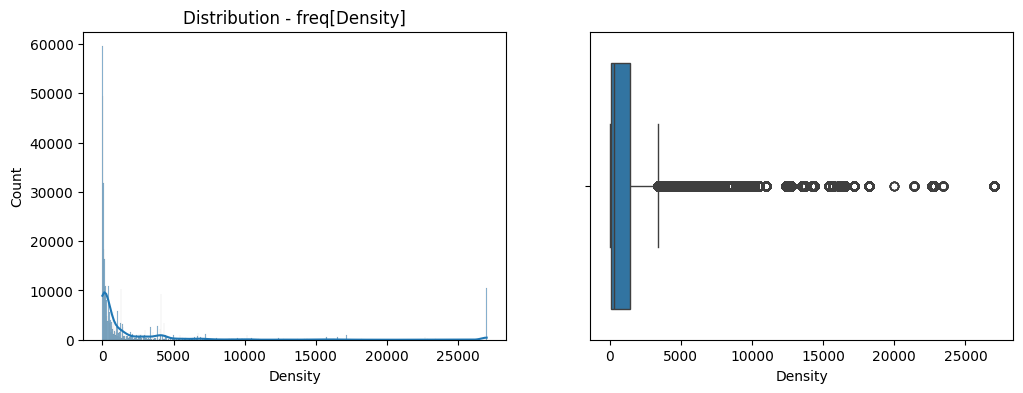

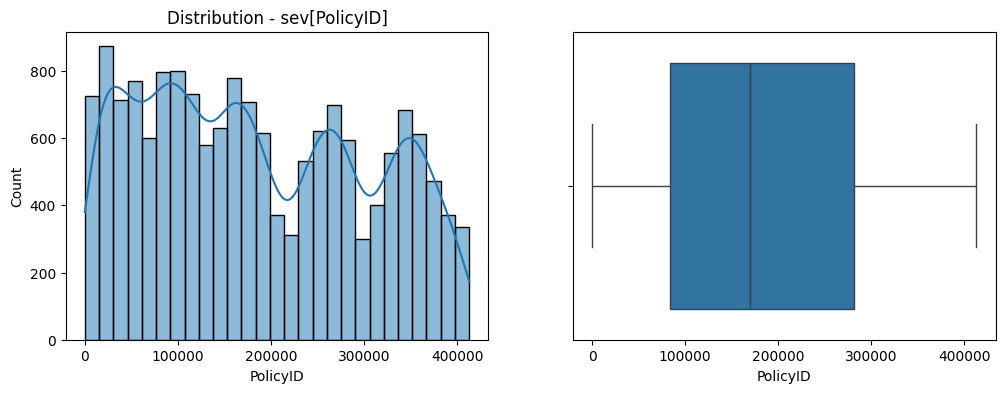

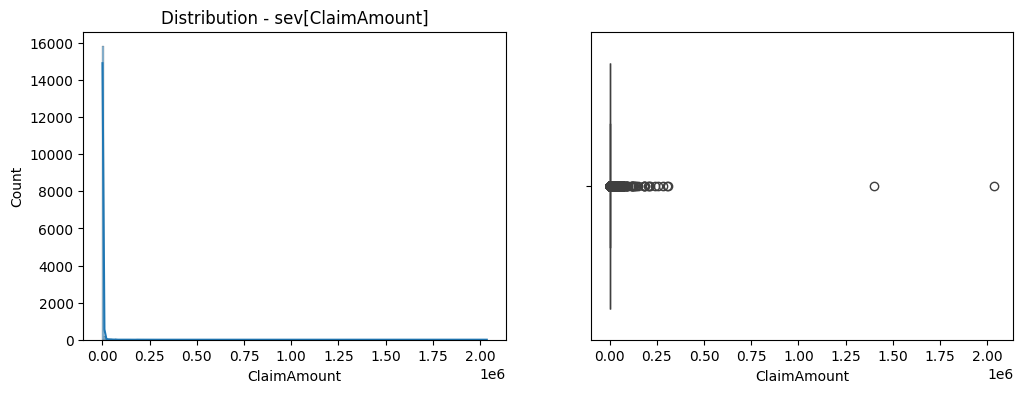

In [16]:
for col in freq.select_dtypes('number').columns:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(freq[col], kde=True)
    plt.title(f"Distribution - freq[{col}]")
    plt.subplot(1,2,2)
    sns.boxplot(x=freq[col])
    plt.show()

for col in sev.select_dtypes('number').columns:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(sev[col], kde=True)
    plt.title(f"Distribution - sev[{col}]")
    plt.subplot(1,2,2)
    sns.boxplot(x=sev[col])
    plt.show()

In [17]:
cat_cols = freq.select_dtypes('object').columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    freq[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Répartition de {col}")
    plt.ylabel("Fréquence (%)")
    plt.show()

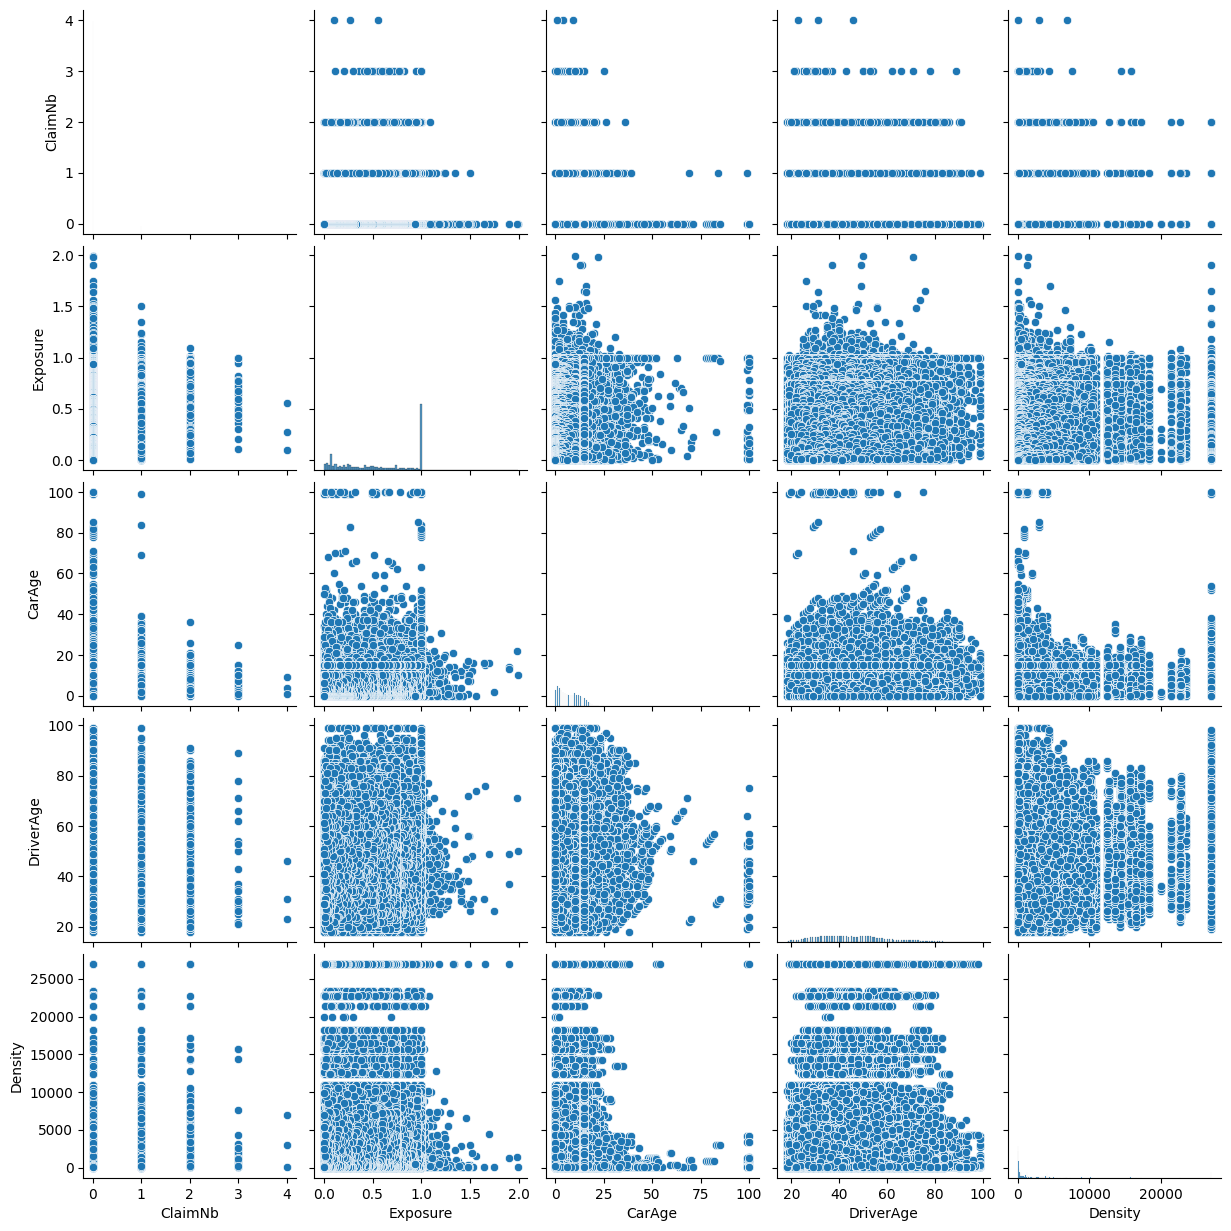

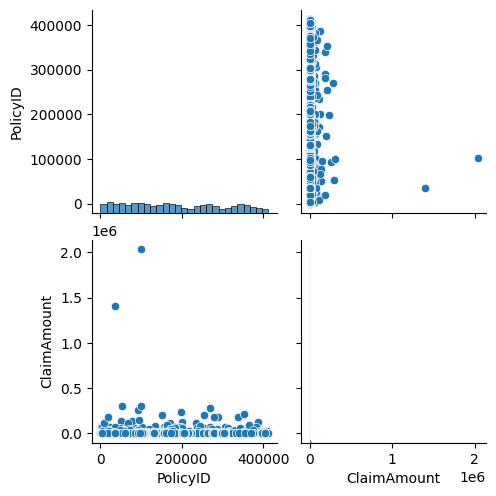

In [18]:
sns.pairplot(freq.select_dtypes('number'))
plt.show()

sns.pairplot(sev.select_dtypes('number'))
plt.show()

Statistiques descriptives de ClaimAmount :
count    1.618100e+04
mean     2.129972e+03
std      2.106364e+04
min      2.000000e+00
1%       4.100000e+01
5%       8.100000e+01
25%      6.980000e+02
50%      1.156000e+03
75%      1.243000e+03
95%      4.284000e+03
99%      1.610940e+04
max      2.036833e+06
Name: ClaimAmount, dtype: float64

Skewness : 75.13134938983397
Kurtosis : 6601.196918165215



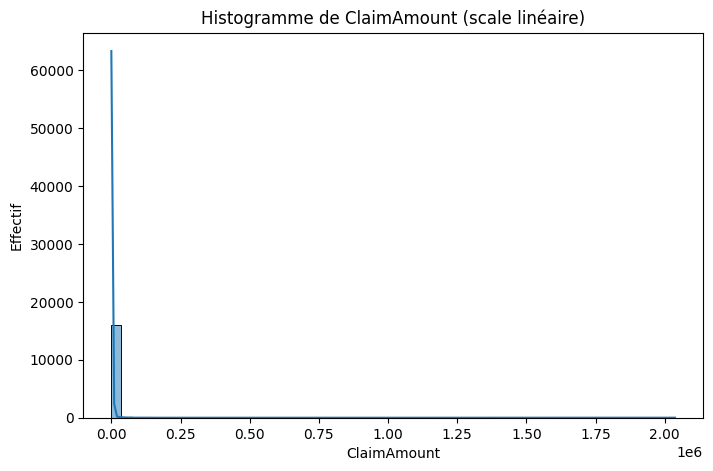

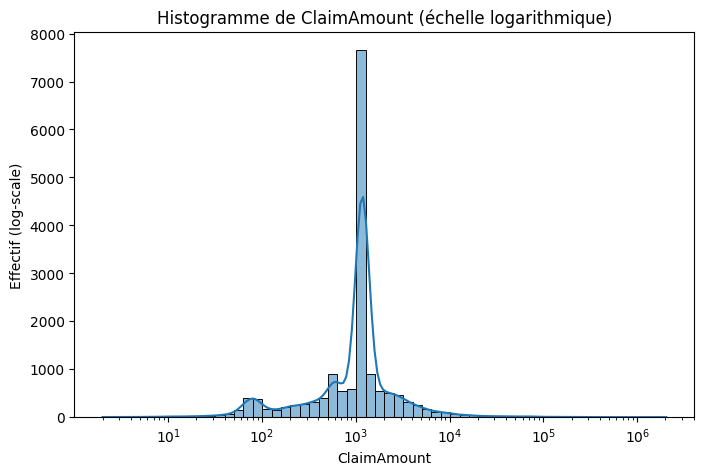

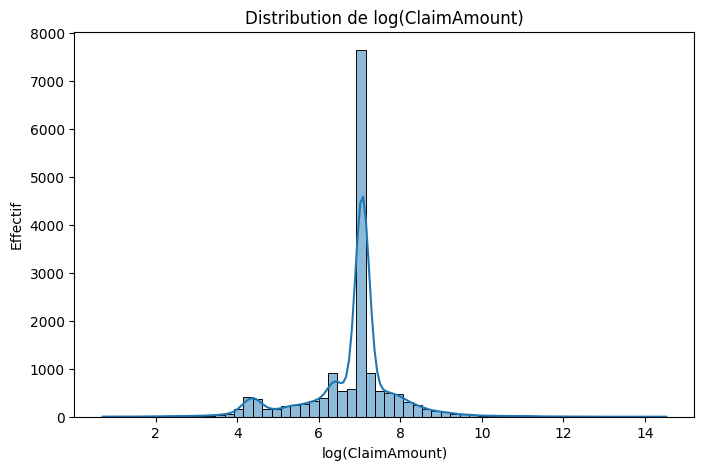

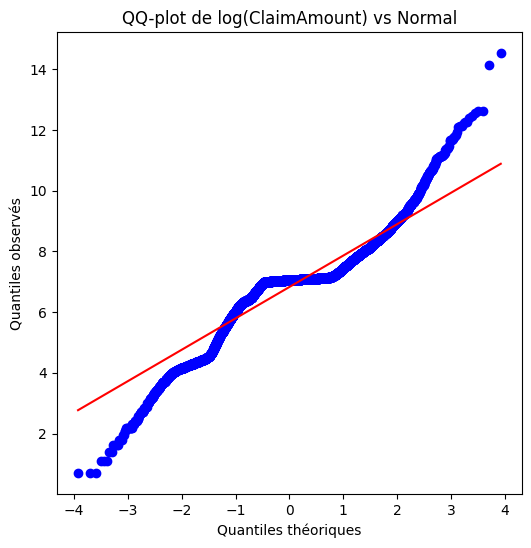

Paramètres Lognormale :
  shape (sigma) = 1.115195814664736
  loc           = 0
  scale         = 922.9590022439447



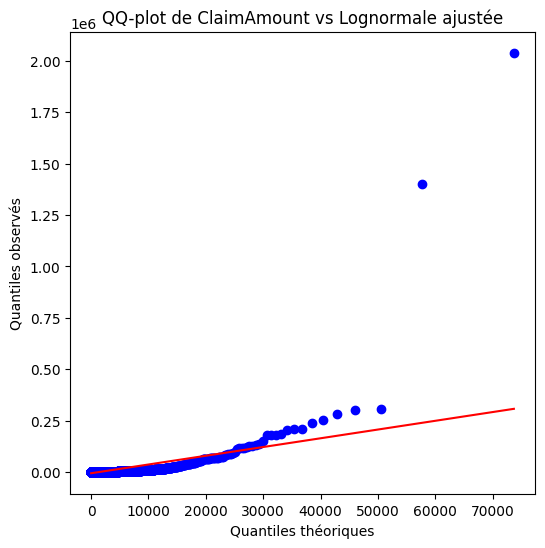

Paramètres Gamma :
  alpha (shape) = 0.7198582433278922
  loc           = 0
  beta (scale)  = 2958.8770066112406



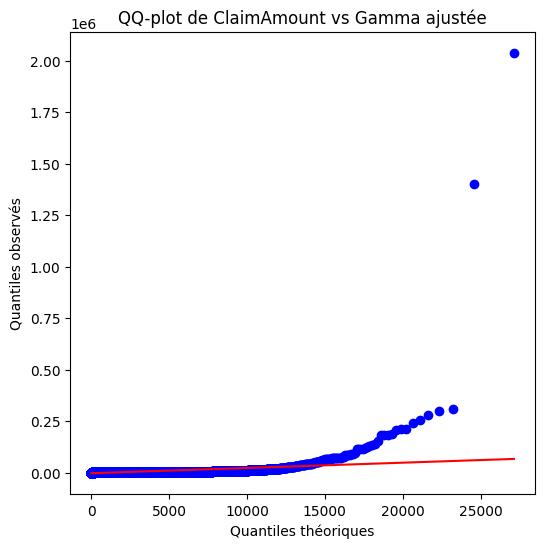

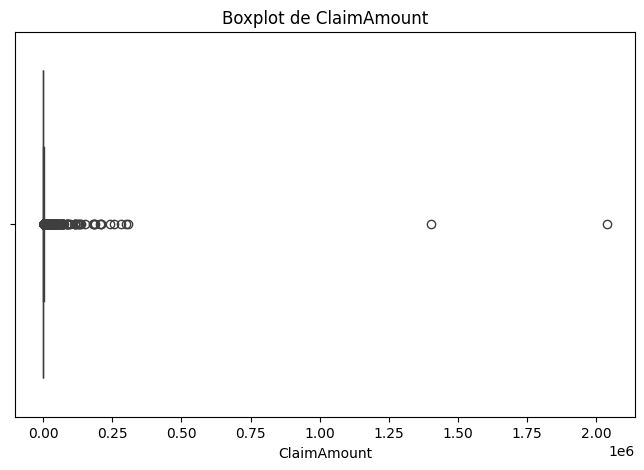

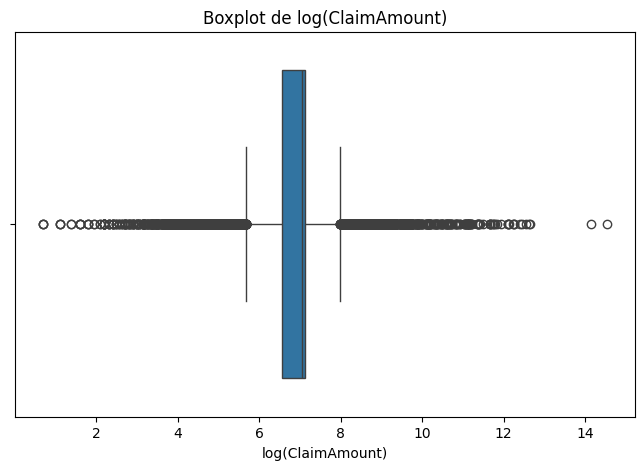

In [22]:
import scipy.stats as stats

# ================================
#  EDA SÉVÉRITÉ : ClaimAmount
# ================================

# 1. Statistiques descriptives de base
print("Statistiques descriptives de ClaimAmount :")
print(sev["ClaimAmount"].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]))
print()

# Skewness / Kurtosis
print("Skewness :", sev["ClaimAmount"].skew())
print("Kurtosis :", sev["ClaimAmount"].kurt())
print()

# 2. Histogramme (échelle linéaire)
plt.figure(figsize=(8,5))
sns.histplot(sev["ClaimAmount"], bins=60, kde=True)
plt.title("Histogramme de ClaimAmount (scale linéaire)")
plt.xlabel("ClaimAmount")
plt.ylabel("Effectif")
plt.show()

# 3. Histogramme log-scale
plt.figure(figsize=(8,5))
sns.histplot(sev["ClaimAmount"], bins=60, kde=True, log_scale=True)
plt.title("Histogramme de ClaimAmount (échelle logarithmique)")
plt.xlabel("ClaimAmount")
plt.ylabel("Effectif (log-scale)")
plt.show()

# 4. Distribution de log(ClaimAmount)
log_claim = np.log(sev["ClaimAmount"])

plt.figure(figsize=(8,5))
sns.histplot(log_claim, bins=60, kde=True)
plt.title("Distribution de log(ClaimAmount)")
plt.xlabel("log(ClaimAmount)")
plt.ylabel("Effectif")
plt.show()

# 5. QQ-plot pour vérifier la normalité de log(Y)
plt.figure(figsize=(6,6))
stats.probplot(log_claim, dist="norm", plot=plt)
plt.title("QQ-plot de log(ClaimAmount) vs Normal")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

# 6. Ajustement d'une loi Lognormale sur ClaimAmount
shape, loc, scale = stats.lognorm.fit(sev["ClaimAmount"], floc=0)
print("Paramètres Lognormale :")
print("  shape (sigma) =", shape)
print("  loc           =", loc)
print("  scale         =", scale)
print()

plt.figure(figsize=(6,6))
stats.probplot(
    sev["ClaimAmount"],
    dist=stats.lognorm(shape, loc=loc, scale=scale),
    plot=plt
)
plt.title("QQ-plot de ClaimAmount vs Lognormale ajustée")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

# 7. Ajustement d'une loi Gamma sur ClaimAmount
alpha, loc_g, beta = stats.gamma.fit(sev["ClaimAmount"], floc=0)
print("Paramètres Gamma :")
print("  alpha (shape) =", alpha)
print("  loc           =", loc_g)
print("  beta (scale)  =", beta)
print()

plt.figure(figsize=(6,6))
stats.probplot(
    sev["ClaimAmount"],
    dist=stats.gamma(alpha, loc=loc_g, scale=beta),
    plot=plt
)
plt.title("QQ-plot de ClaimAmount vs Gamma ajustée")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

# 8. Analyse des valeurs extrêmes (boxplots)
plt.figure(figsize=(8,5))
sns.boxplot(x=sev["ClaimAmount"])
plt.title("Boxplot de ClaimAmount")
plt.xlabel("ClaimAmount")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=log_claim)
plt.title("Boxplot de log(ClaimAmount)")
plt.xlabel("log(ClaimAmount)")
plt.show()